<a href="https://colab.research.google.com/github/AlirezaParchami/Real-time-Character-Detection-using-Faster-RCNN/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Dependencies and Detectron2

In [ ]:
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

In [3]:
#Download Character Dataset and unzip
#!wget https://github.com/MinhasKamal/AlphabetRecognizer/files/1084725/English.Alphabet.Dataset.zip
!unzip English.Alphabet.Dataset.zip

Archive:  English.Alphabet.Dataset.zip
replace English Alphabet Dataset/test/1/1.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace English Alphabet Dataset/test/1/1_1.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
# nakoooooooooooooooooooooooooooooooooooooooon
#Version 1
from detectron2.structures import BoxMode
from detectron2.data import MetadataCatalog, DatasetCatalog

def get_character_dict(img_dir, num):
  dir = img_dir + str(num)+ "/" + str(num) + ".json"
  json_file = os.path.join(dir)
  
  with open(json_file) as f:
    imgs_anns = json.load(f)
  
  character_dicts = []
  for idx, v in zip(imgs_anns.keys(), imgs_anns.values()):
    record = {}

    filename = os.path.join(img_dir + str(num) + "/" + v["filename"])
    height, width = cv2.imread(filename).shape[:2]

    record["file_name"] = filename
    record["image_id"] = idx
    record["height"] = height
    record["width"] = width

    annos = v["regions"]
    objs = []
    for _, anno in annos.items():
      anno = anno["shape_attributes"]
      px = anno["points_x"]
      py = anno["points_y"]
      poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
      poly = [p for x in poly for p in x]

      obj = {
          "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
          "bbox_mode": BoxMode.XYXY_ABS,
          "segmentation": [poly],
          "category_id": num - 1,
      }
      objs.append(obj)
    record["annotations"] = objs
    character_dicts.append(record)
  return character_dicts
  

for d in range(1,8):
  DatasetCatalog.register("character_train_" + str(d), lambda d=d: get_character_dict("English Alphabet Dataset/", d))
  MetadataCatalog.get("character_train_" + str(d)).set(thing_classes=[str(d)])
character_metadata = MetadataCatalog.get("character_train")
print("Finished Successfully")

Finished Successfully


In [5]:
#Version 2
from detectron2.structures import BoxMode
from detectron2.data import MetadataCatalog, DatasetCatalog

def get_character_dict(img_dir):
  dataset_dicts = []
  for num in range(1,8):
    dir = img_dir + str(num)+ "/" + str(num) + ".json"
    json_file = os.path.join(dir)
  
    with open(json_file) as f:
      imgs_anns = json.load(f)
  
    character_dicts = []
    for idx, v in zip(imgs_anns.keys(), imgs_anns.values()):
      record = {}

      filename = os.path.join(img_dir + str(num) + "/" + v["filename"])
      height, width = cv2.imread(filename).shape[:2]

      record["file_name"] = filename
      record["image_id"] = idx
      record["height"] = height
      record["width"] = width

      annos = v["regions"]
      objs = []
      for _, anno in annos.items():
        anno = anno["shape_attributes"]
        px = anno["points_x"]
        py = anno["points_y"]
        poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
        poly = [p for x in poly for p in x]

        obj = {
            "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
            "bbox_mode": BoxMode.XYXY_ABS,
            "segmentation": [poly],
            "category_id": num - 1,
        }
        objs.append(obj)
      record["annotations"] = objs
      character_dicts.append(record)

    dataset_dicts.extend(character_dicts)
  return dataset_dicts
  

for d in ["train", "test"]:
  DatasetCatalog.register("character_" + d, lambda d=d: get_character_dict("English Alphabet Dataset/" + d + "/"))
  MetadataCatalog.get("character_" + str(d)).set(thing_classes=["1","2","3","4","5","6","7"])
character_metadata = MetadataCatalog.get("character_train")
print("Finished Successfully")

AssertionError: ignored

In [6]:
#Check if the metadata is added successfully

from detectron2.utils.visualizer import Visualizer
dataset_dicts = get_character_dict("English Alphabet Dataset/train/")

for d in random.sample(dataset_dicts, 3):
  print(d)
  img = cv2.imread(d["file_name"])
  visualizer = Visualizer(img[:, :, ::-1], metadata=character_metadata, scale=0.5)
  out = visualizer.draw_dataset_dict(d)
  cv2_imshow(out.get_image()[:, :, ::-1])

{'file_name': 'English Alphabet Dataset/train/5/5_29.png', 'image_id': '5_29', 'height': 60, 'width': 60, 'annotations': [{'bbox': [1, 6, 58, 56], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'segmentation': [[1.5, 6.5, 58.5, 56.5]], 'category_id': 4}]}


{'file_name': 'English Alphabet Dataset/train/6/6_10.png', 'image_id': '6_10', 'height': 60, 'width': 60, 'annotations': [{'bbox': [2, 5, 58, 57], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'segmentation': [[2.5, 5.5, 58.5, 57.5]], 'category_id': 5}]}


{'file_name': 'English Alphabet Dataset/train/6/6_23.png', 'image_id': '6_23', 'height': 60, 'width': 60, 'annotations': [{'bbox': [2, 5, 58, 57], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'segmentation': [[2.5, 5.5, 58.5, 57.5]], 'category_id': 5}]}


**Train the Model**

Want to fine-tune a COCO-pretrained R50-FPN 3x with model reference number of 137849458 for Faster RCNN






In [8]:
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
#cfg.DATASETS.TRAIN = ("character_train_1","character_train_2", "character_train_3", "character_train_4", "character_train_5","character_train_6","character_train_7",)
cfg.DATASETS.TRAIN = ("character_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0002
cfg.SOLVER.MAX_ITER = 100
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 7


In [9]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[01/19 14:17:16 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (28, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (28,) in the model! You might want to double check if this is expected.


[01/19 14:17:19 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:217: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  num_fg = fg_inds.nonzero().numel()


[01/19 14:17:38 d2.utils.events]:  eta: 0:01:18  iter: 19  total_loss: 2.022  loss_cls: 1.908  loss_box_reg: 0.09536  loss_rpn_cls: 0.002849  loss_rpn_loc: 0.008905  time: 0.9698  data_time: 0.0138  lr: 3.9962e-06  max_mem: 1826M
[01/19 14:17:57 d2.utils.events]:  eta: 0:00:58  iter: 39  total_loss: 1.782  loss_cls: 1.666  loss_box_reg: 0.09348  loss_rpn_cls: 0.004034  loss_rpn_loc: 0.007398  time: 0.9689  data_time: 0.0067  lr: 7.9922e-06  max_mem: 1826M
[01/19 14:18:17 d2.utils.events]:  eta: 0:00:39  iter: 59  total_loss: 1.283  loss_cls: 1.185  loss_box_reg: 0.09445  loss_rpn_cls: 0.002994  loss_rpn_loc: 0.007994  time: 0.9762  data_time: 0.0063  lr: 1.1988e-05  max_mem: 1826M
[01/19 14:18:36 d2.utils.events]:  eta: 0:00:19  iter: 79  total_loss: 0.7841  loss_cls: 0.6463  loss_box_reg: 0.09999  loss_rpn_cls: 0.004251  loss_rpn_loc: 0.006641  time: 0.9728  data_time: 0.0071  lr: 1.5984e-05  max_mem: 1826M
[01/19 14:18:57 d2.utils.events]:  eta: 0:00:00  iter: 99  total_loss: 0.427  

**Evaluate**

In [25]:
cfg.MODEL.WEIGHTS = os.path.join("output/model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3
predictor = DefaultPredictor(cfg)

In [26]:
from google.colab.patches import cv2_imshow

def get_character_dict_test(img_dir):
  dataset_dicts = []
  for num in range(1,8):
    dir = img_dir + str(num)+ "/" + str(num) + ".json"
    json_file = os.path.join(dir)
  
    with open(json_file) as f:
      imgs_anns = json.load(f)
  
    character_dicts = []
    for idx, v in zip(imgs_anns.keys(), imgs_anns.values()):
      record = {}

      filename = os.path.join(img_dir + str(num) + "/" + v["filename"])
      img = cv2.imread(filename)
      height, width = img.shape[:2]

      record["file_name"] = filename
      record["image_id"] = idx
      record["height"] = height
      record["width"] = width

      annos = v["regions"]
      objs = []
      for _, anno in annos.items():
        anno = anno["shape_attributes"]
        px = anno["points_x"]
        py = anno["points_y"]
        poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
        poly = [p for x in poly for p in x]

        obj = {
            "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
            "bbox_mode": BoxMode.XYXY_ABS,
            "segmentation": [poly],
            "category_id": num - 1,
        }
        objs.append(obj)
      record["annotations"] = objs
      character_dicts.append(record)

    dataset_dicts.extend(character_dicts)
  return dataset_dicts

{'instances': Instances(num_instances=0, image_height=60, image_width=60, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64)])}


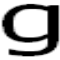

{'instances': Instances(num_instances=0, image_height=60, image_width=60, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64)])}


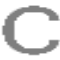

{'instances': Instances(num_instances=0, image_height=60, image_width=60, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64)])}


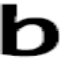

In [36]:
from detectron2.utils.visualizer import ColorMode

dataset_dicts = get_character_dict_test("English Alphabet Dataset/train/")
for d in random.sample(dataset_dicts, 3):  
#for d in dataset_dicts:  
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    print(outputs)
    v = Visualizer(im[:, :, ::-1],
                   metadata=character_metadata, 
                   scale=1,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])